In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-05-25,France,145181.0,144921.0,28408.0,28367.0,260.0,41.0
1,2020-05-25,China,84151.0,84095.0,4655.0,4638.0,56.0,17.0
2,2020-05-25,Italy,230069.0,229858.0,32879.0,32785.0,211.0,94.0
3,2020-05-24,Spain,236992.0,235772.0,29335.0,28752.0,1220.0,583.0
4,2020-05-25,United States,1648540.0,1643238.0,98338.0,97720.0,5302.0,618.0
5,2020-05-25,World,5389479.0,5371700.0,346793.0,344815.0,17779.0,1978.0
6,2020-05-25,United Kingdom,257154.0,259559.0,36730.0,36793.0,-2405.0,-63.0
7,2020-05-25,Germany,178961.0,178570.0,8284.0,8257.0,391.0,27.0
8,2020-05-25,Iran,135864.0,135701.0,7418.0,7417.0,163.0,1.0
9,2020-05-25,Turkey,156578.0,156827.0,4332.0,4340.0,-249.0,-8.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3135.4545454545455
RMSE =  5980.934055966357


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  360.6363636363636
RMSE =  670.022726887271


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  17779.0
RMSE =  17779.0
-- World performances for deaths --
MAPE =  1978.0
RMSE =  1978.0


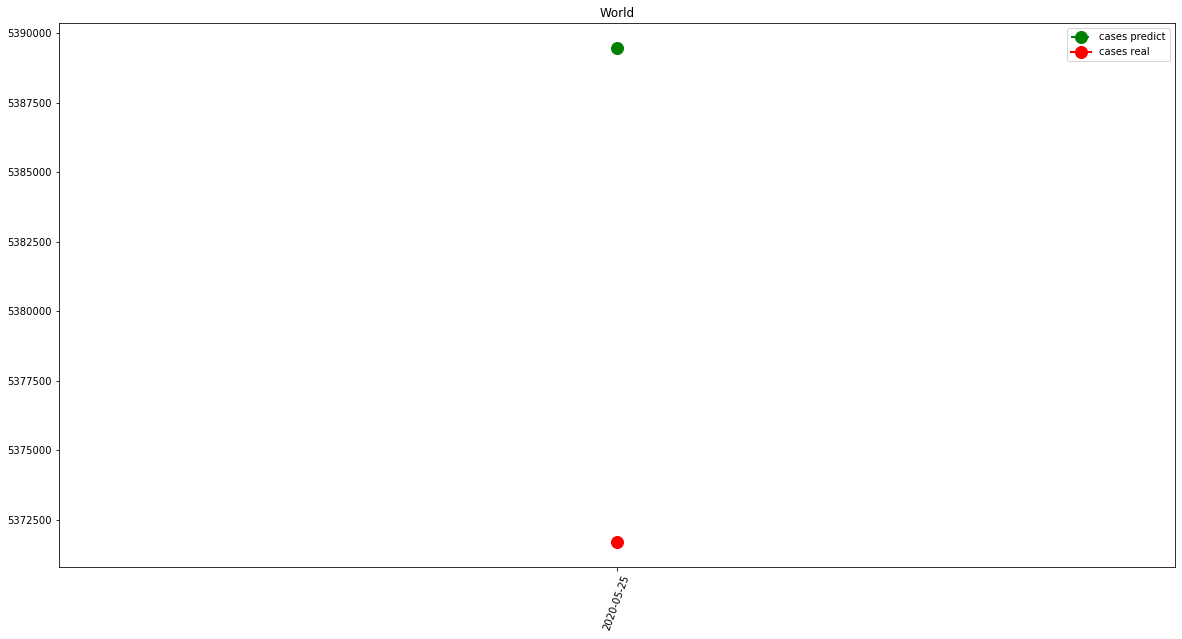

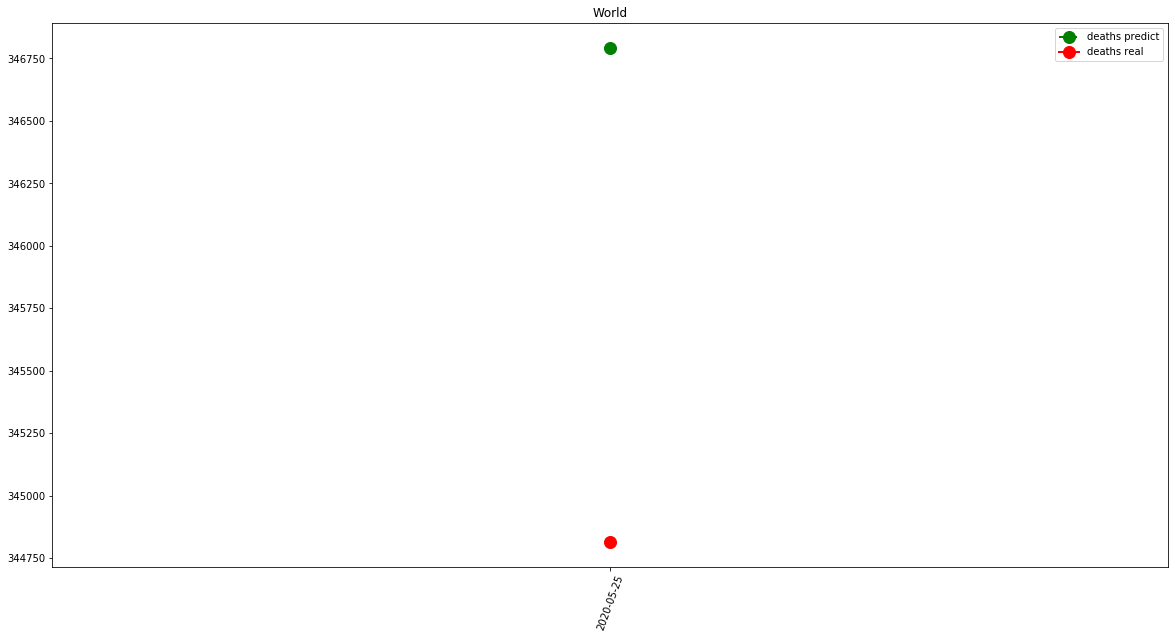

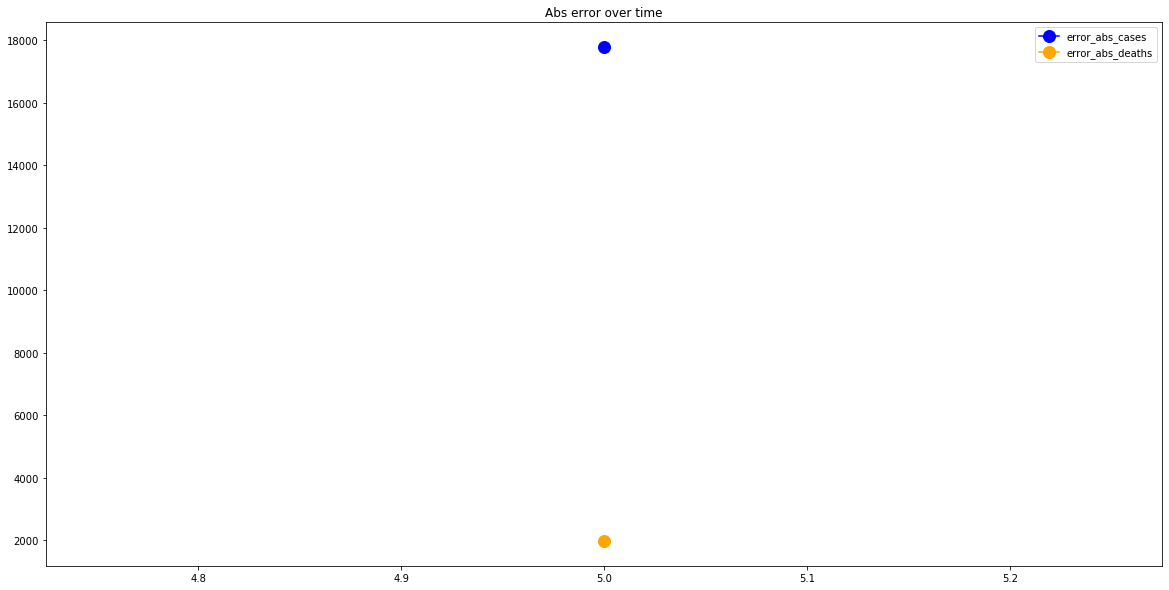

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  260.0
RMSE =  260.0
-- France performances for deaths --
MAPE =  41.0
RMSE =  41.0


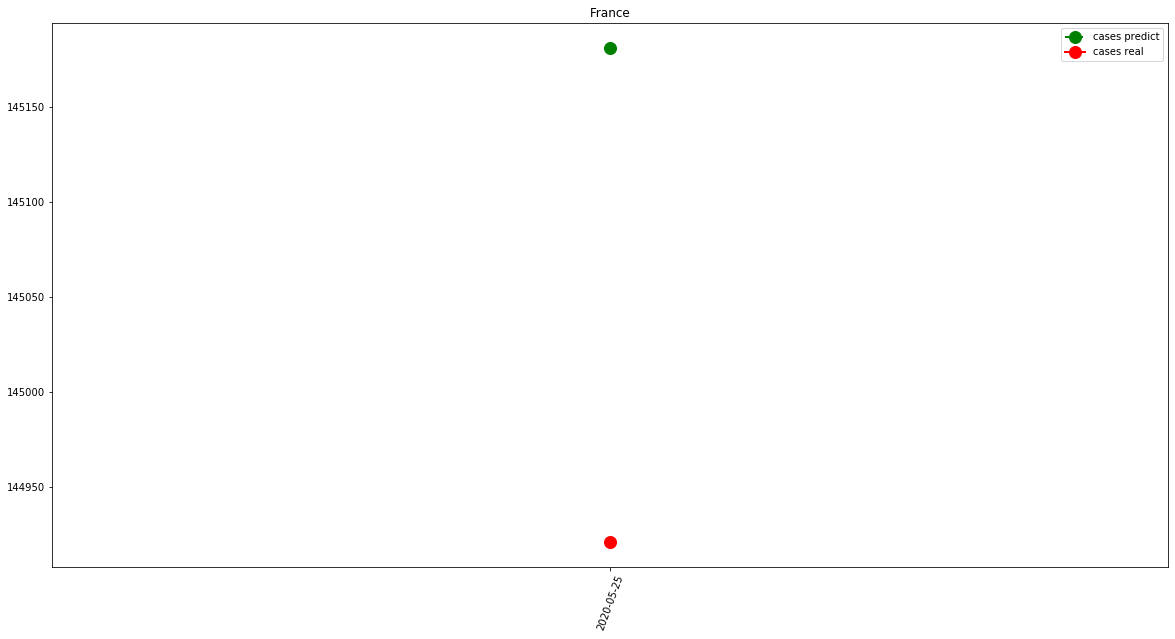

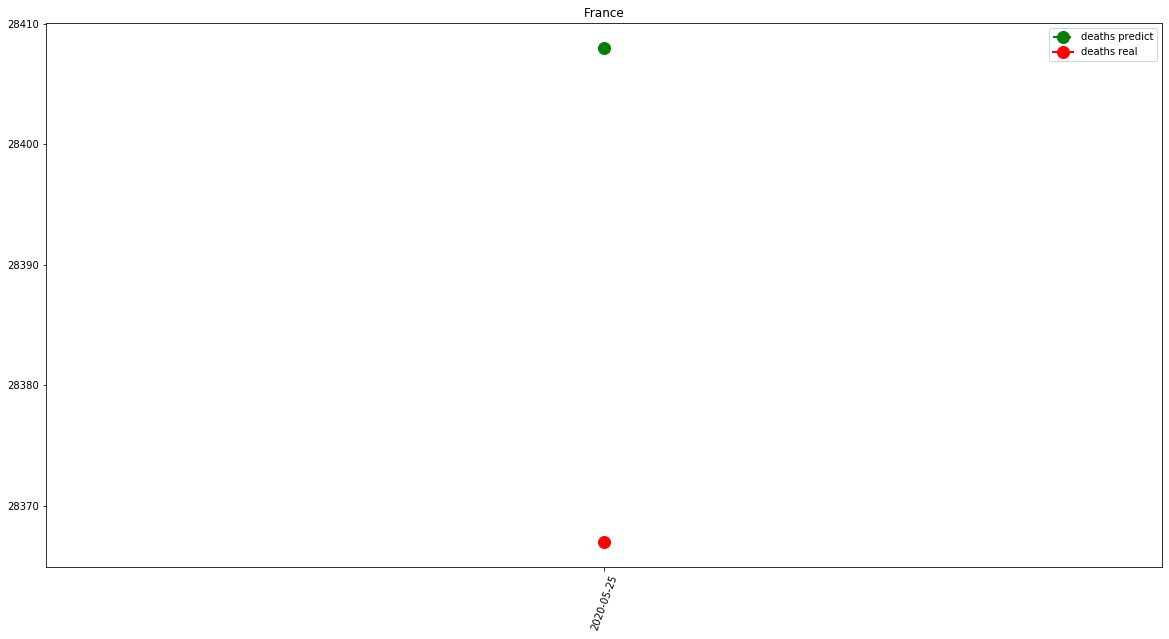

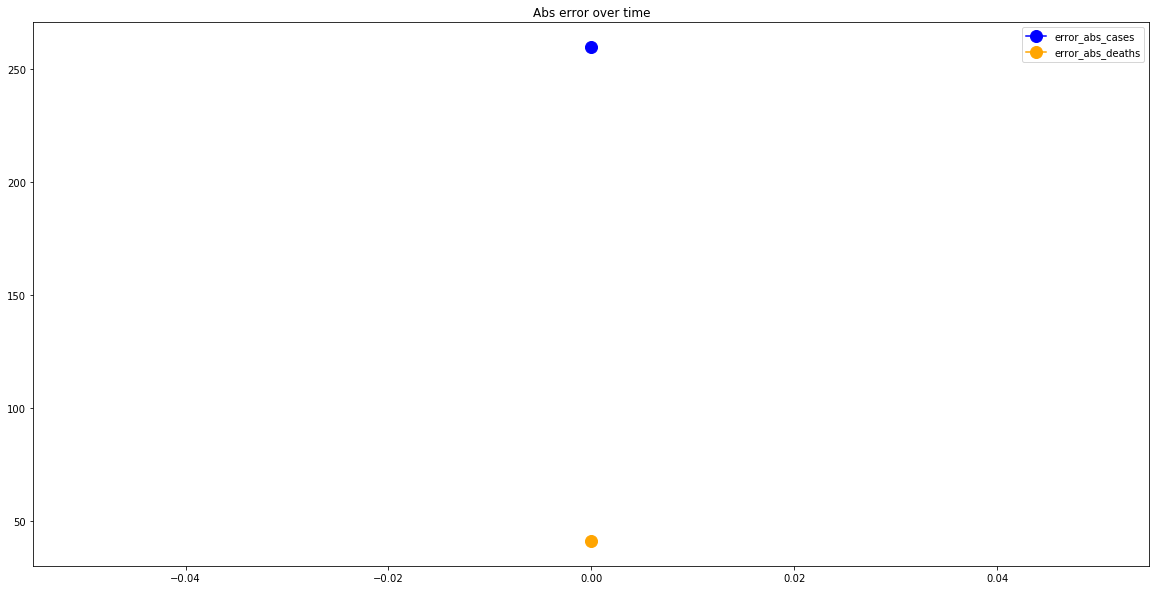

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  211.0
RMSE =  211.0
-- Italy performances for deaths --
MAPE =  94.0
RMSE =  94.0


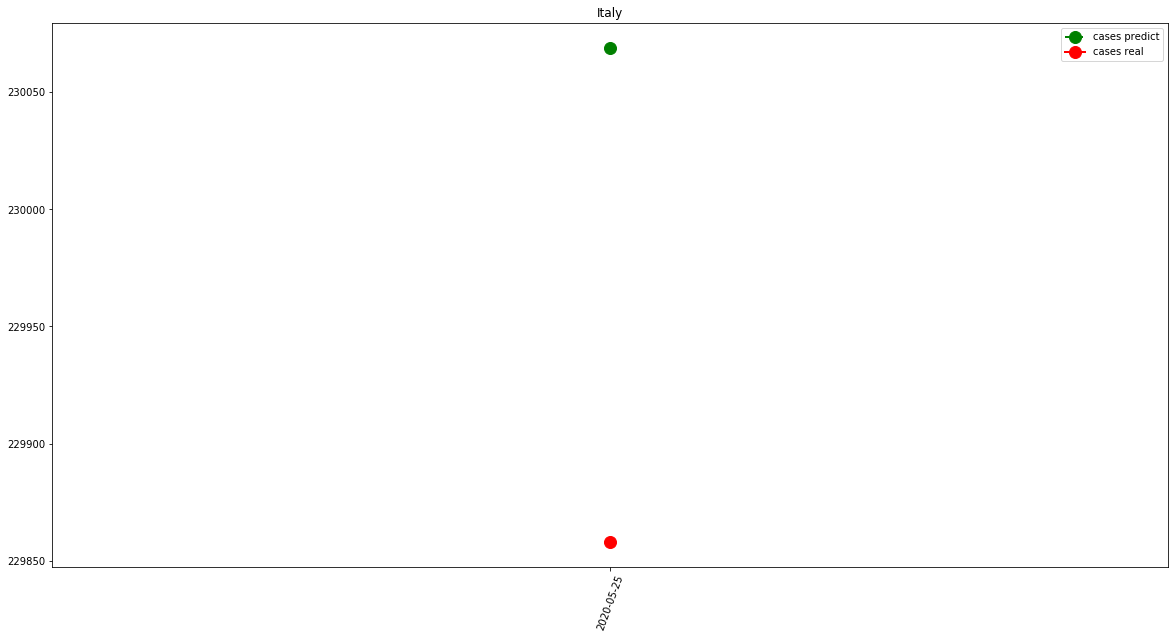

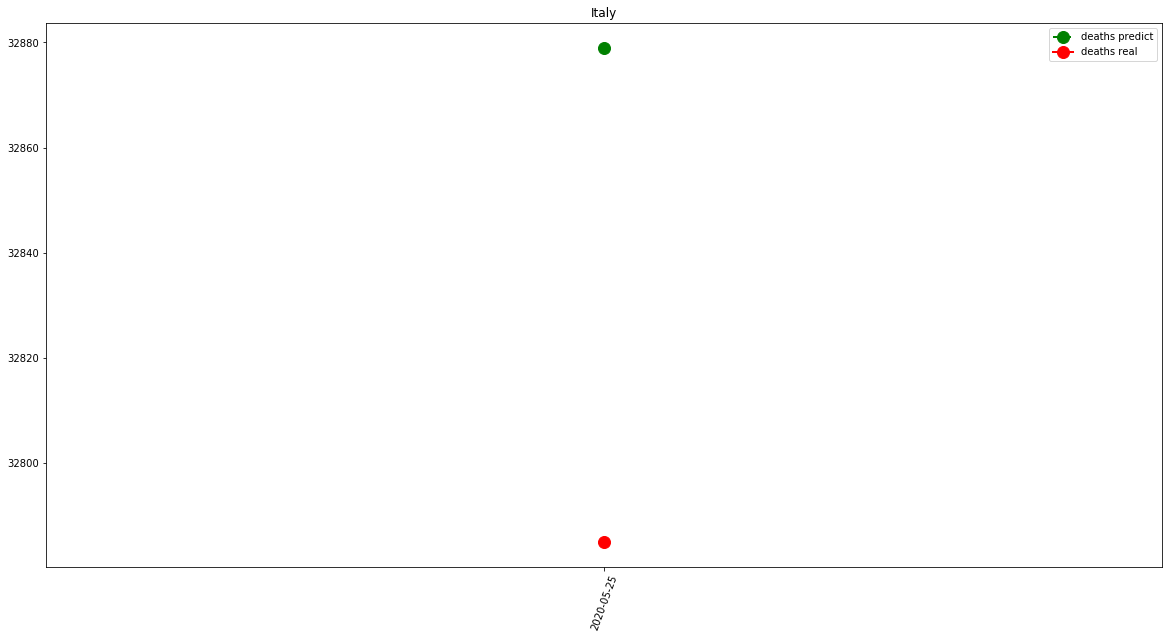

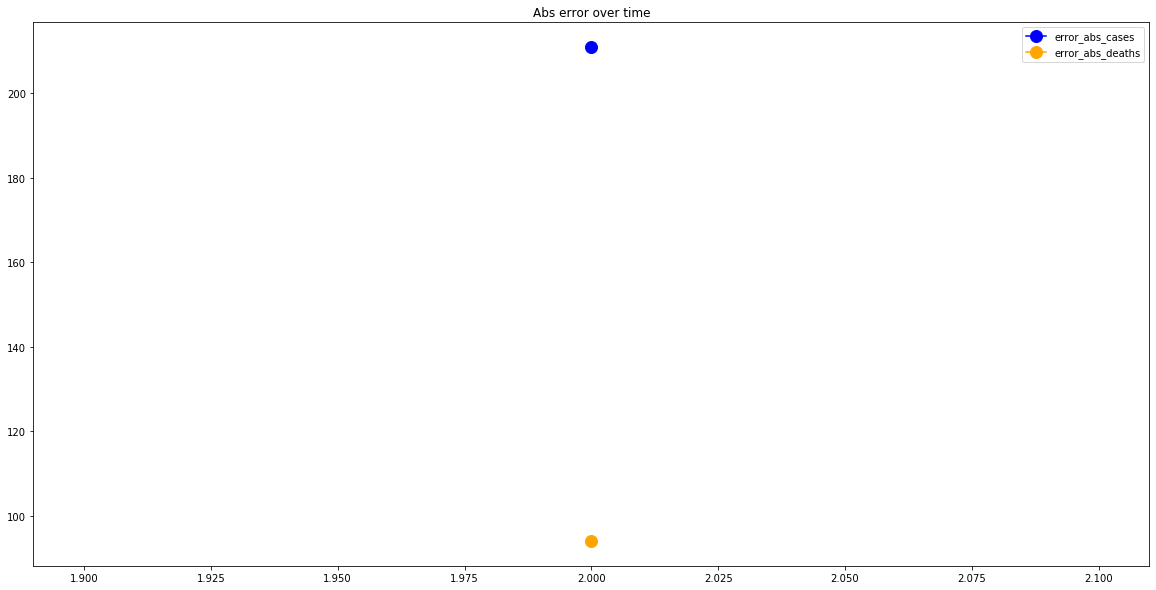

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1220.0
RMSE =  1220.0
-- Spain performances for deaths --
MAPE =  583.0
RMSE =  583.0


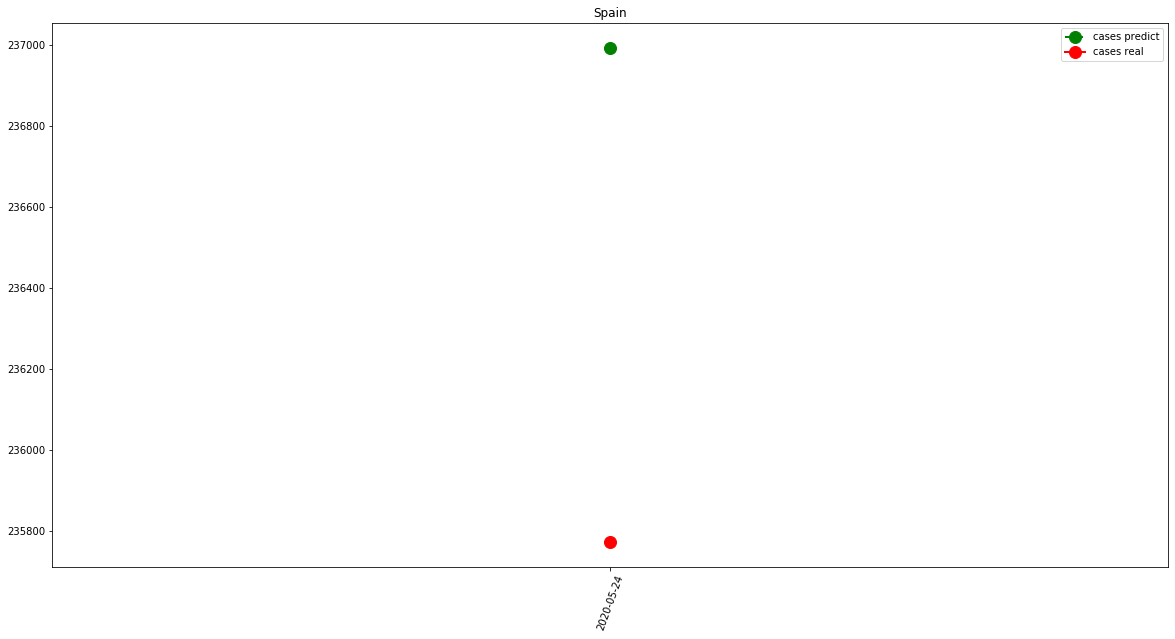

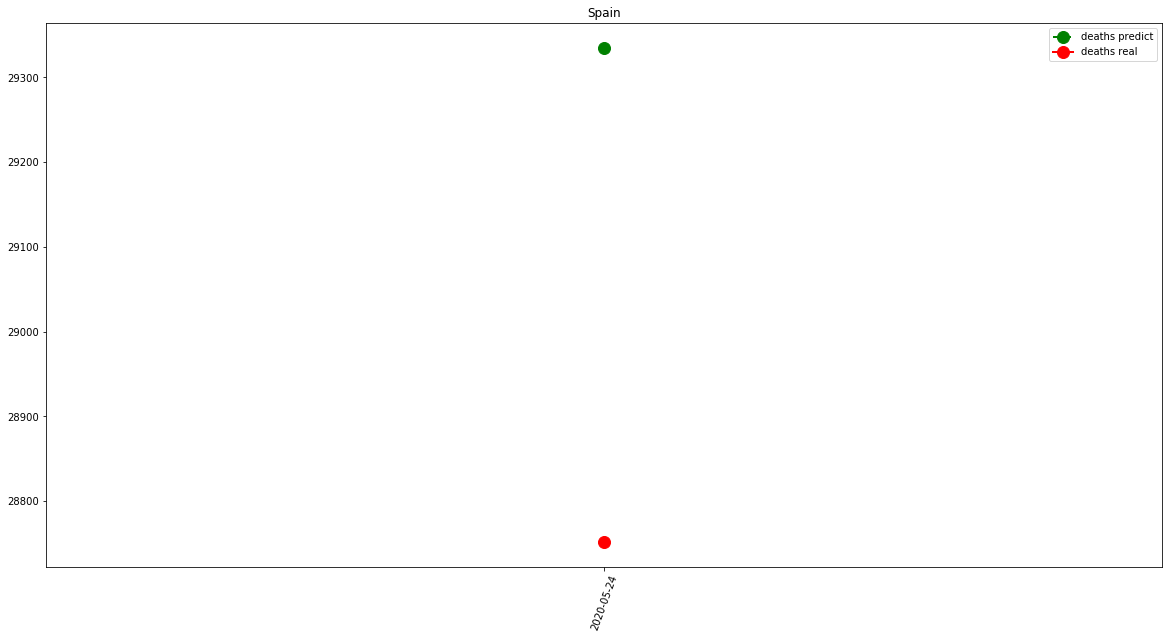

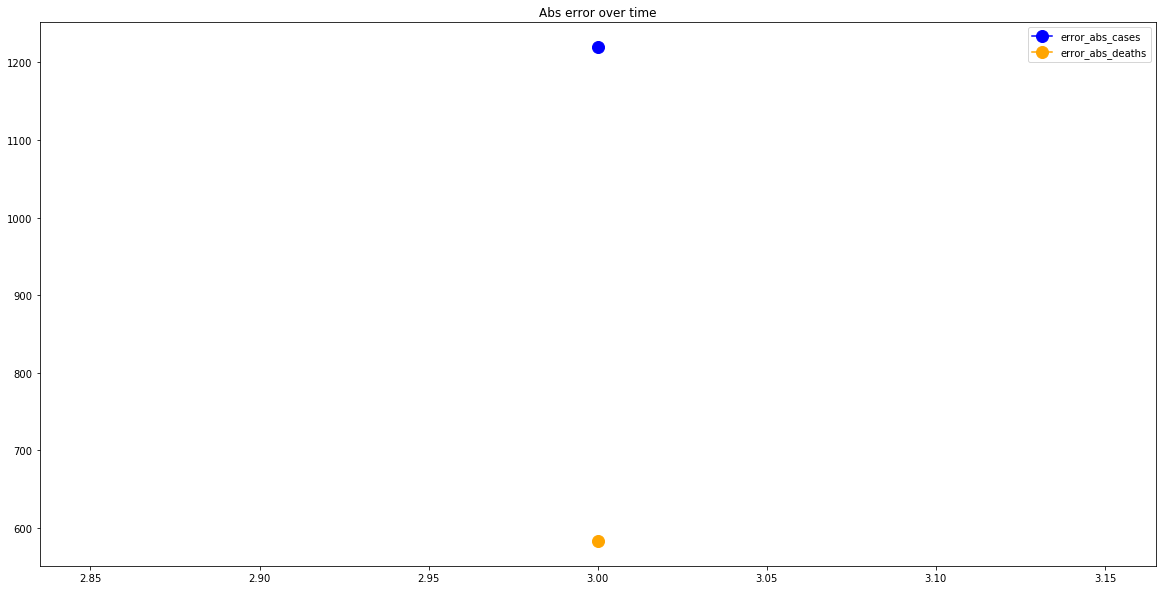

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  5302.0
RMSE =  5302.0
-- United States performances for deaths --
MAPE =  618.0
RMSE =  618.0


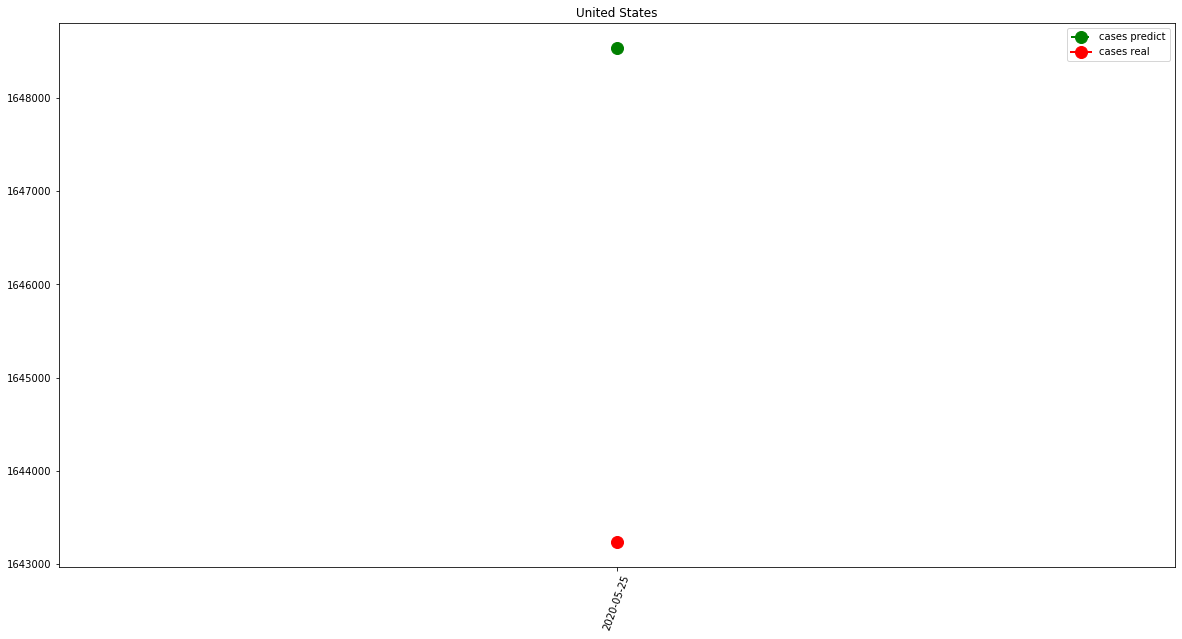

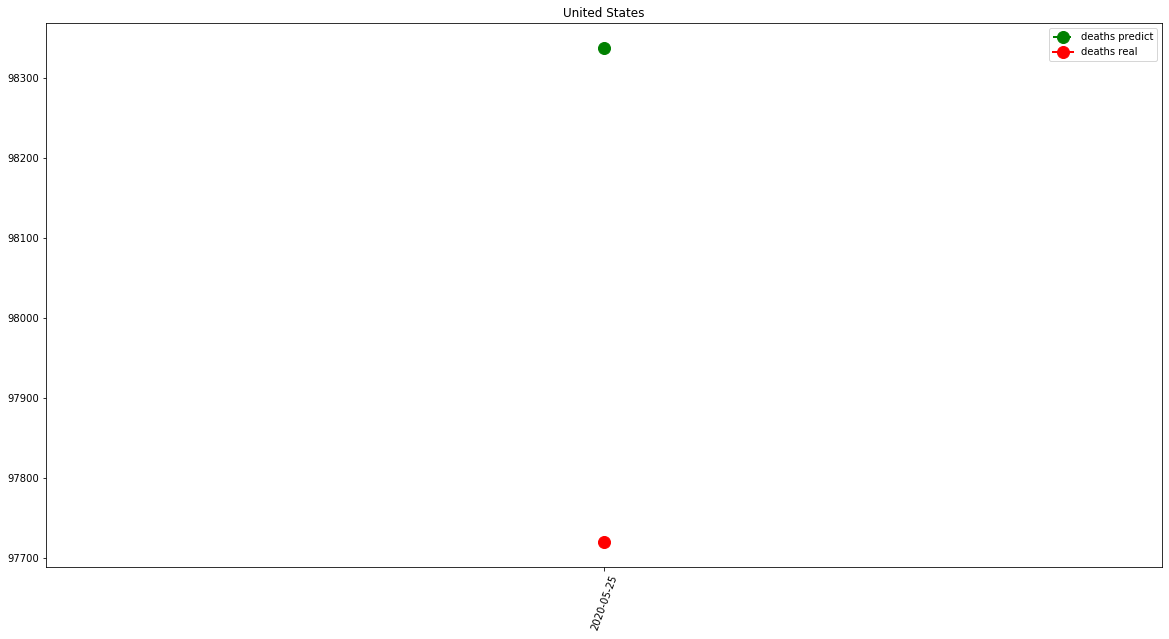

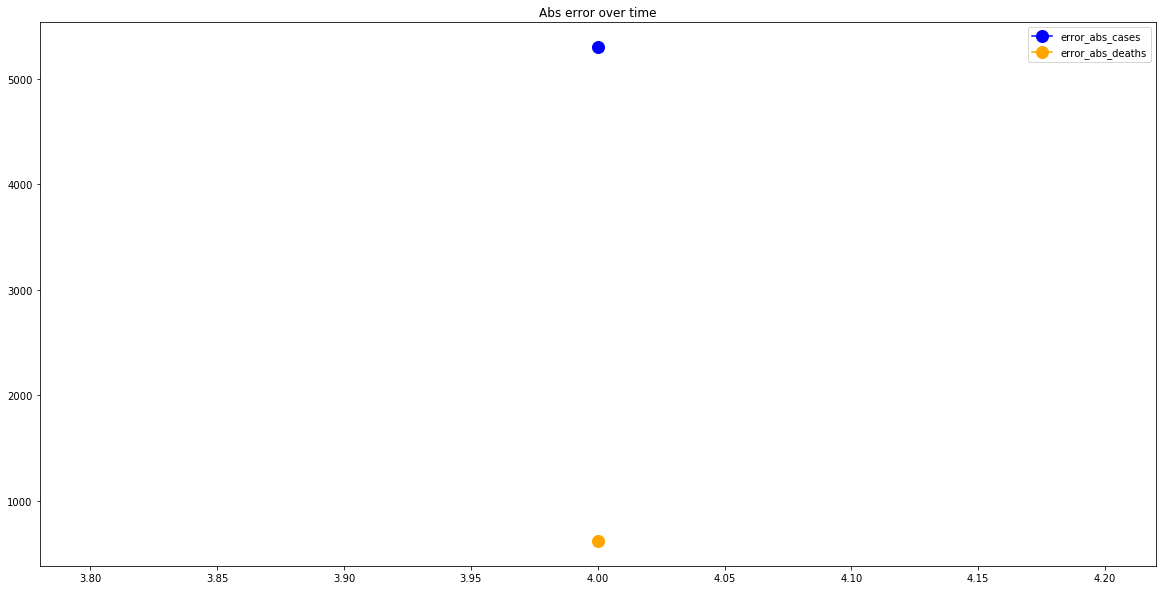

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  56.0
RMSE =  56.0
-- China performances for deaths --
MAPE =  17.0
RMSE =  17.0


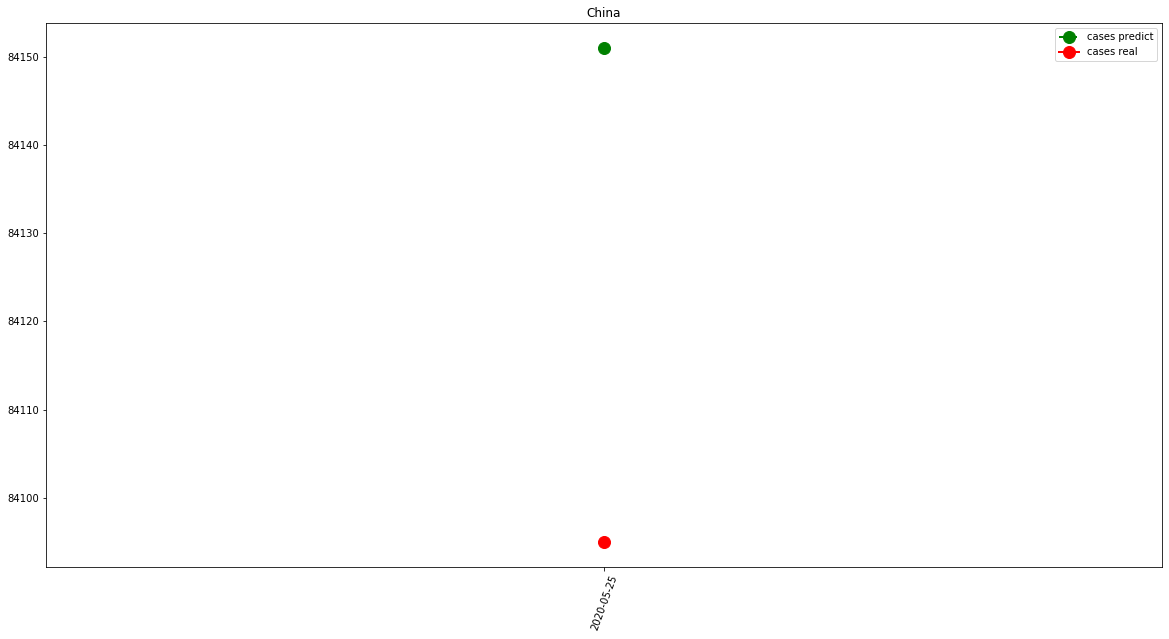

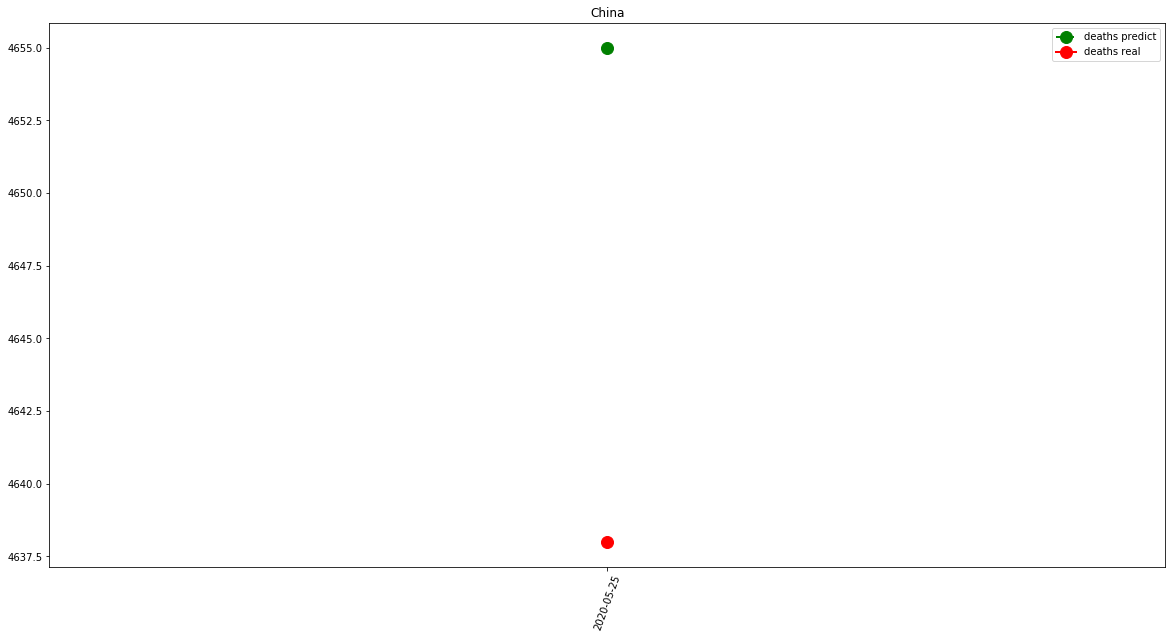

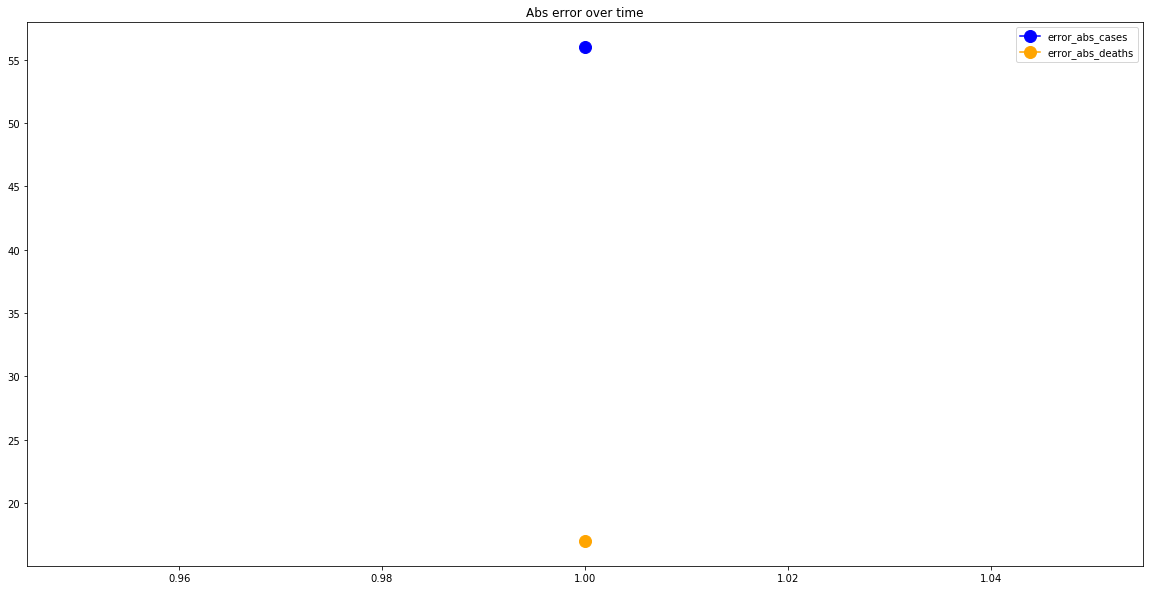

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  2405.0
RMSE =  2405.0
-- United Kingdom performances for deaths --
MAPE =  63.0
RMSE =  63.0


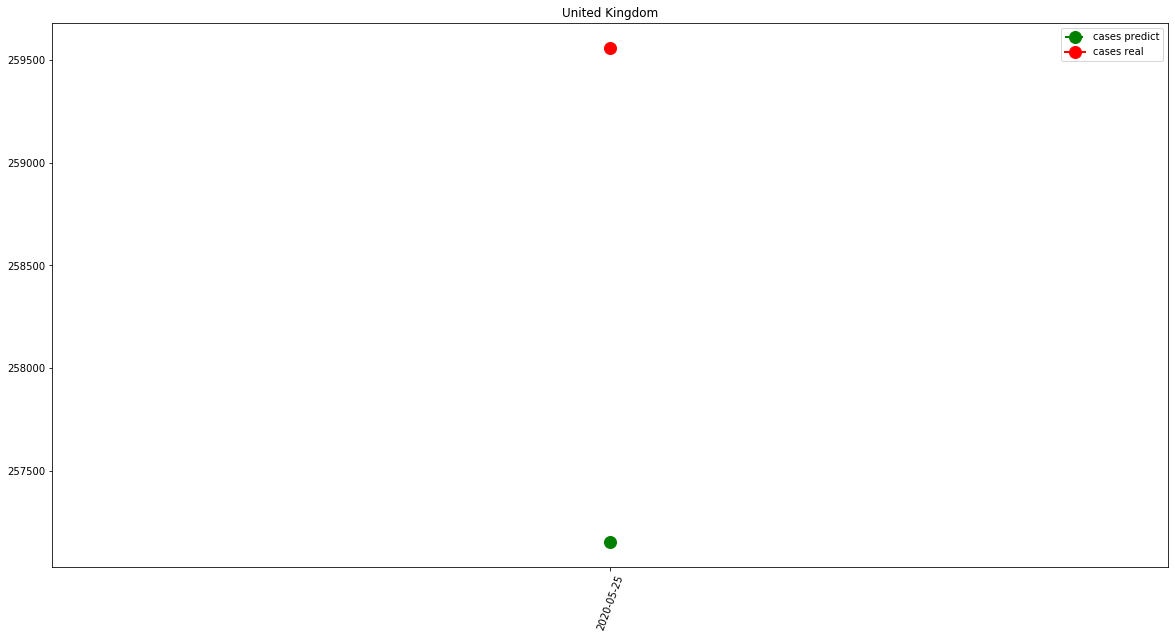

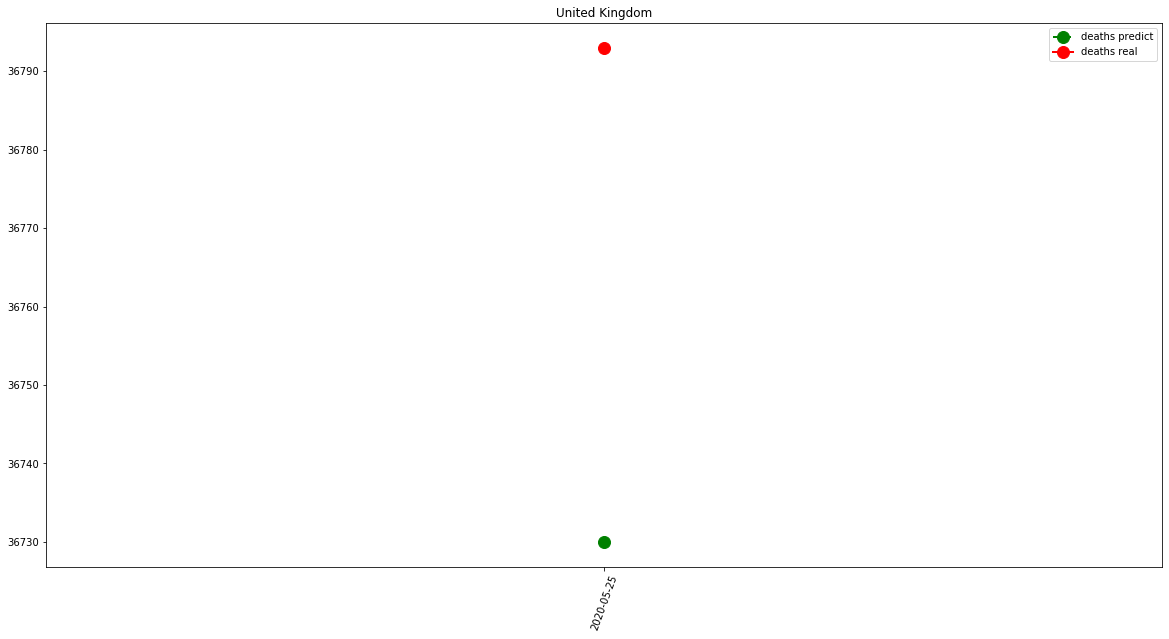

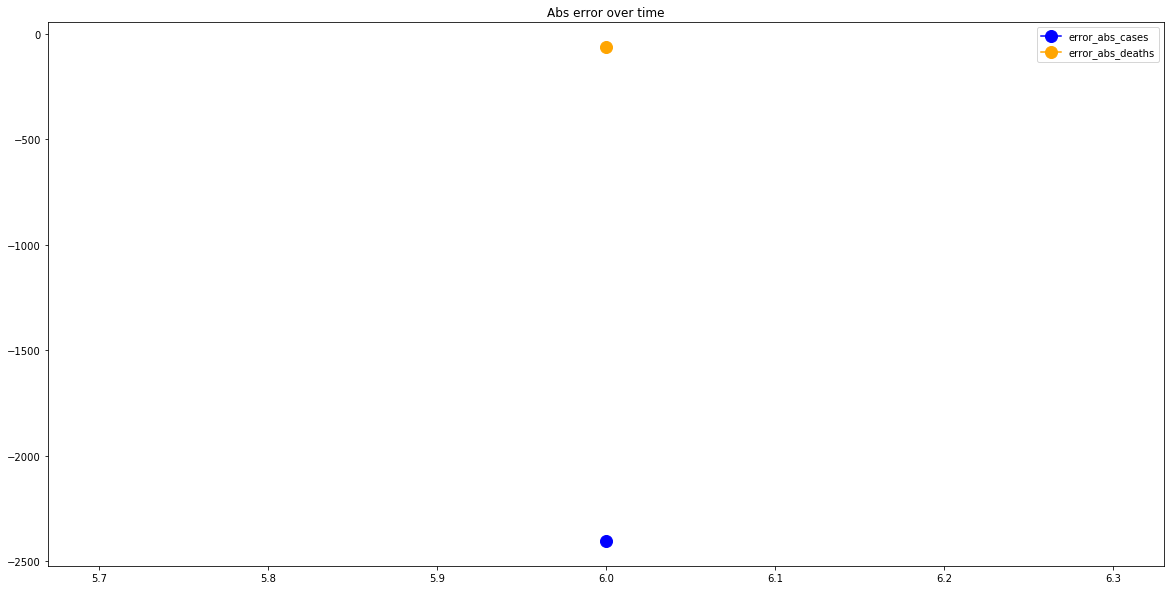

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  391.0
RMSE =  391.0
-- Germany performances for deaths --
MAPE =  27.0
RMSE =  27.0


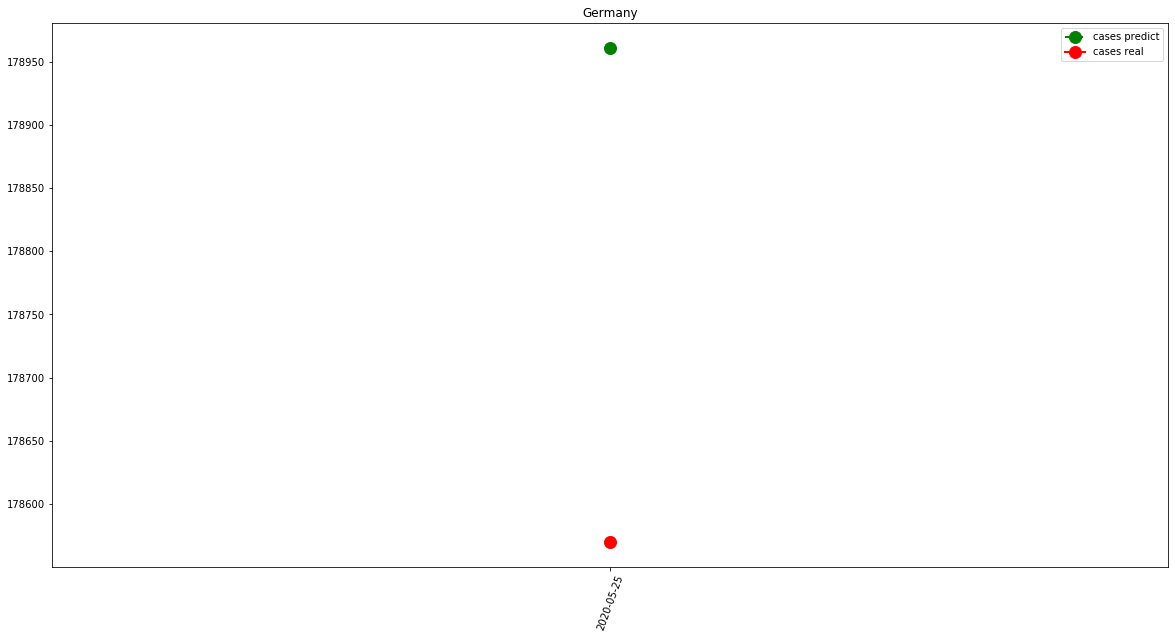

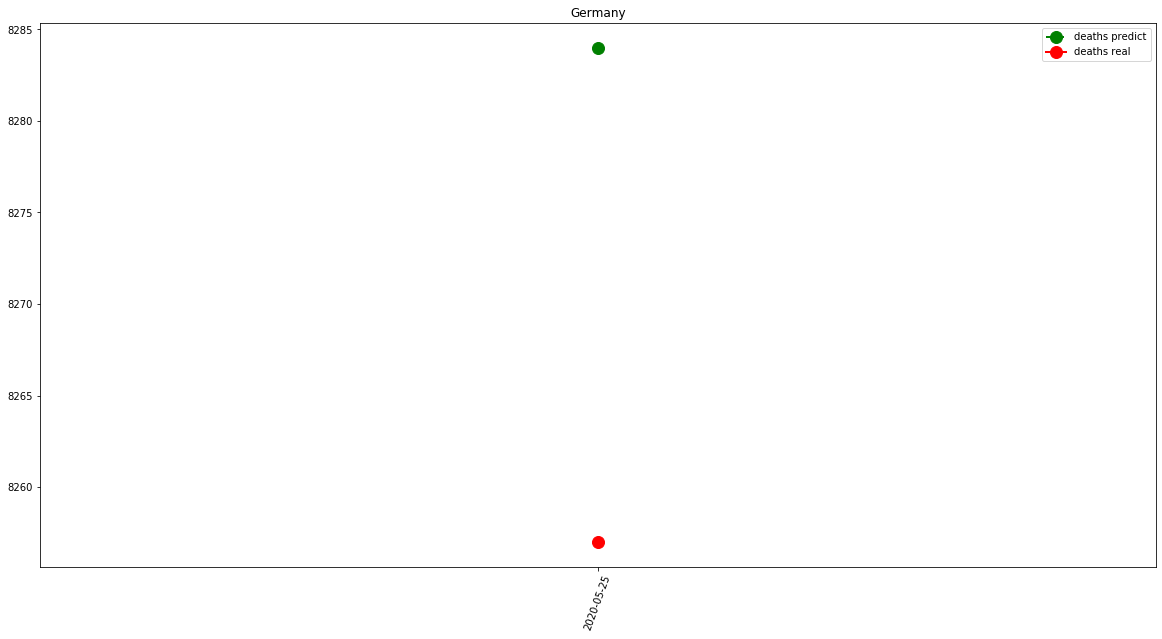

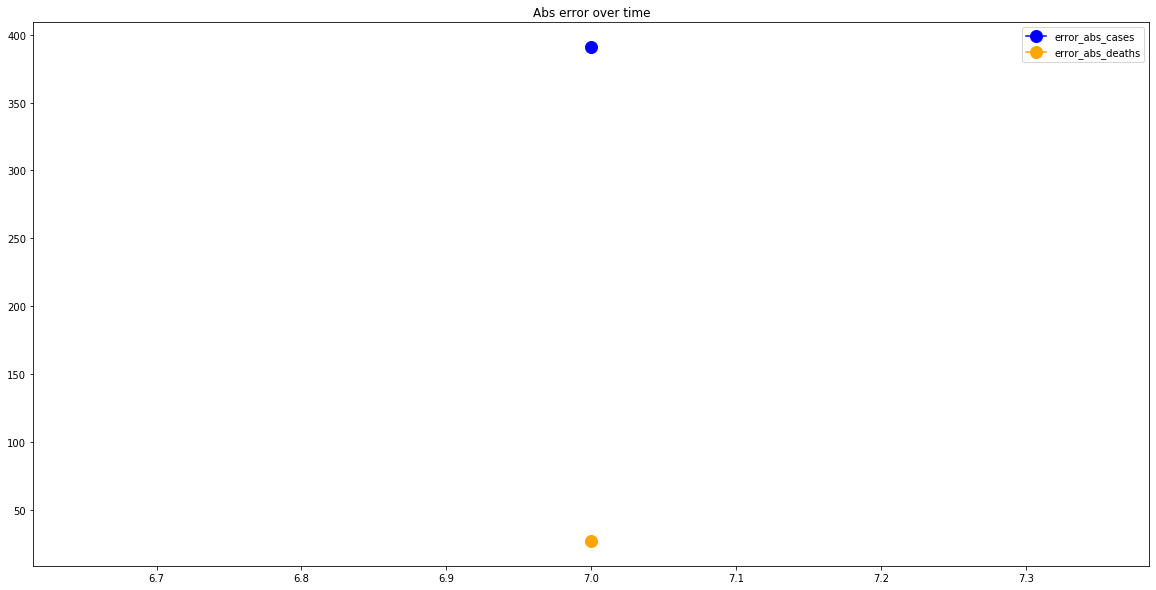

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  163.0
RMSE =  163.0
-- Iran performances for deaths --
MAPE =  1.0
RMSE =  1.0


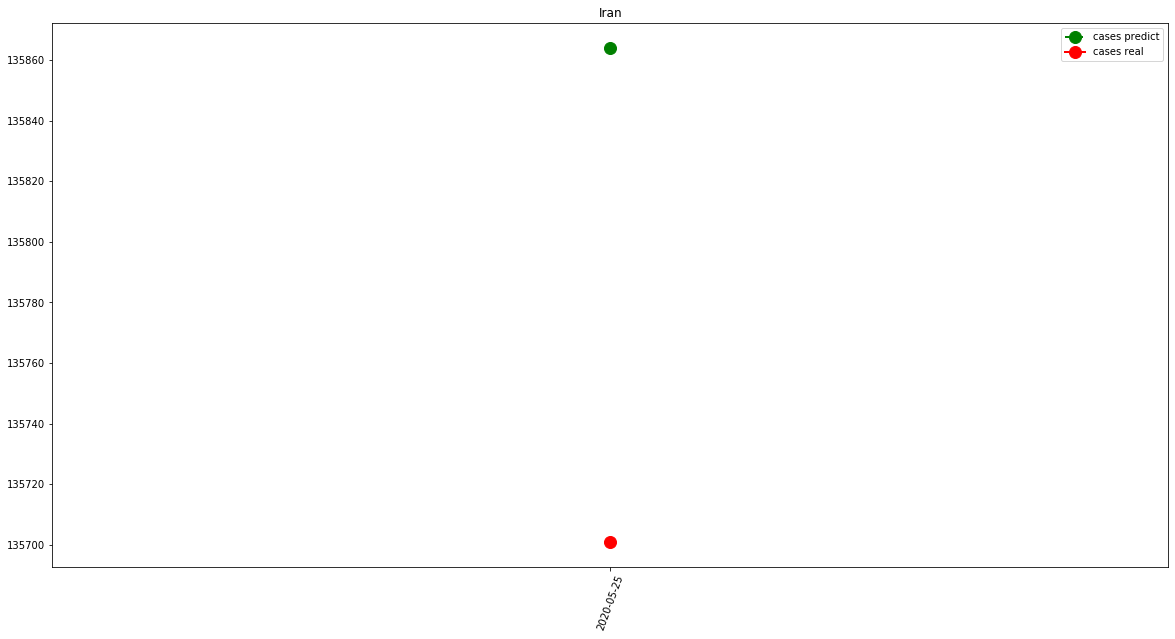

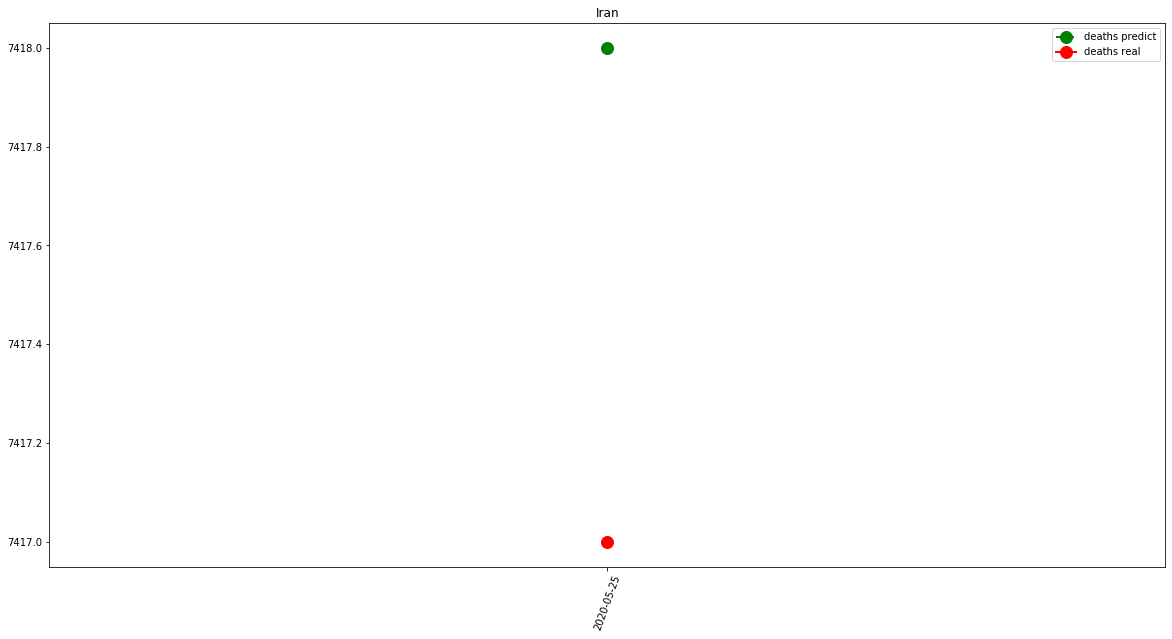

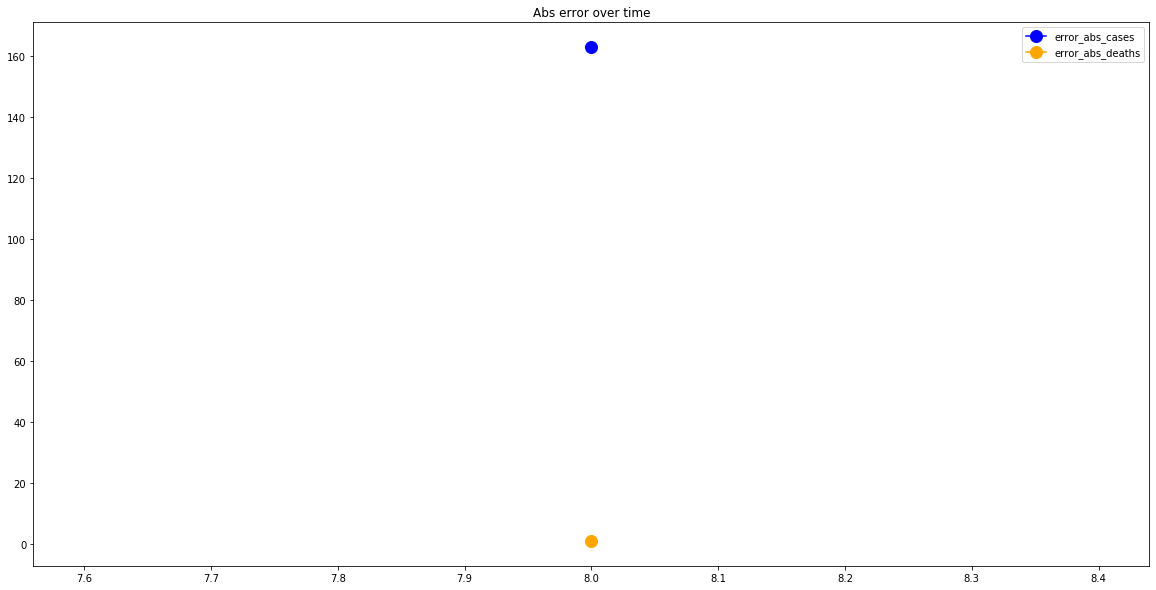

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  249.0
RMSE =  249.0
-- Turkey performances for deaths --
MAPE =  8.0
RMSE =  8.0


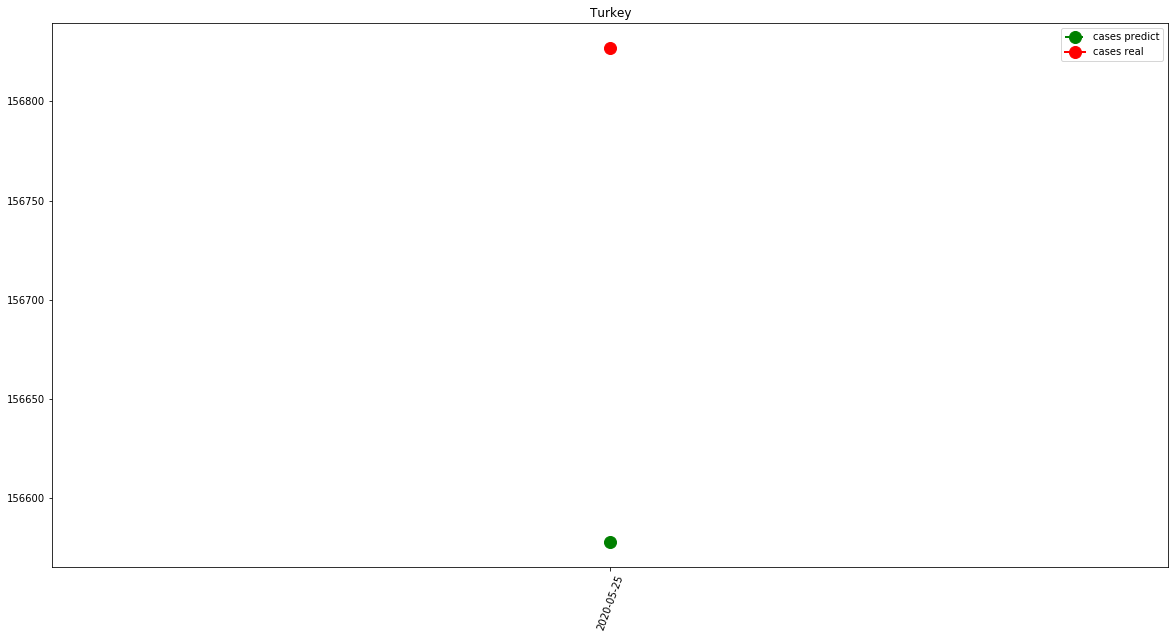

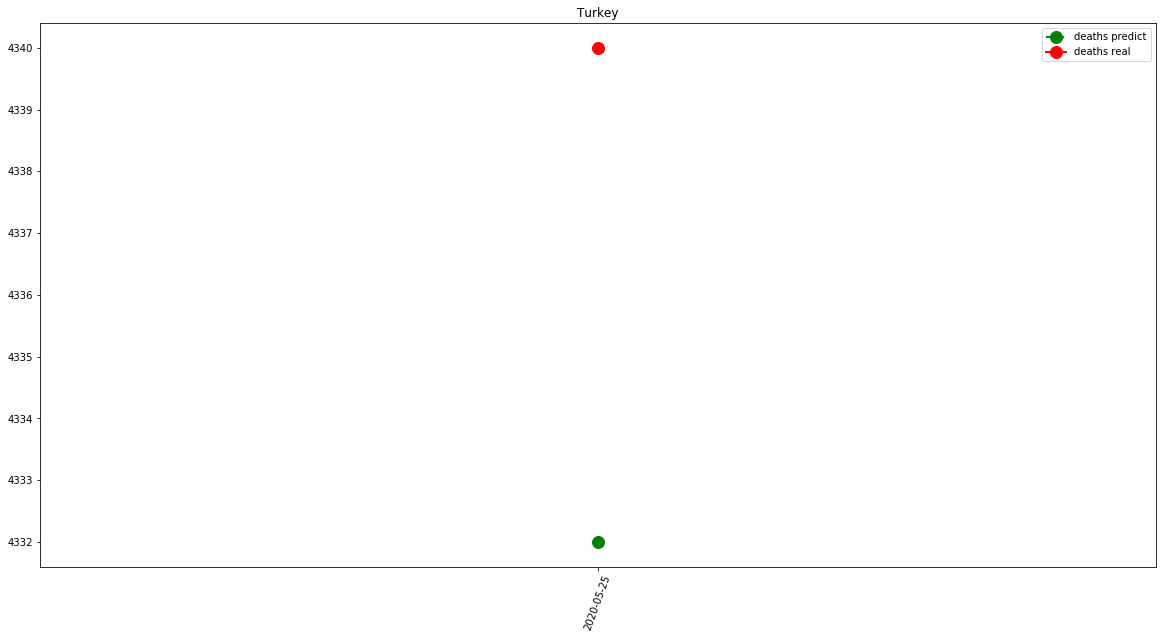

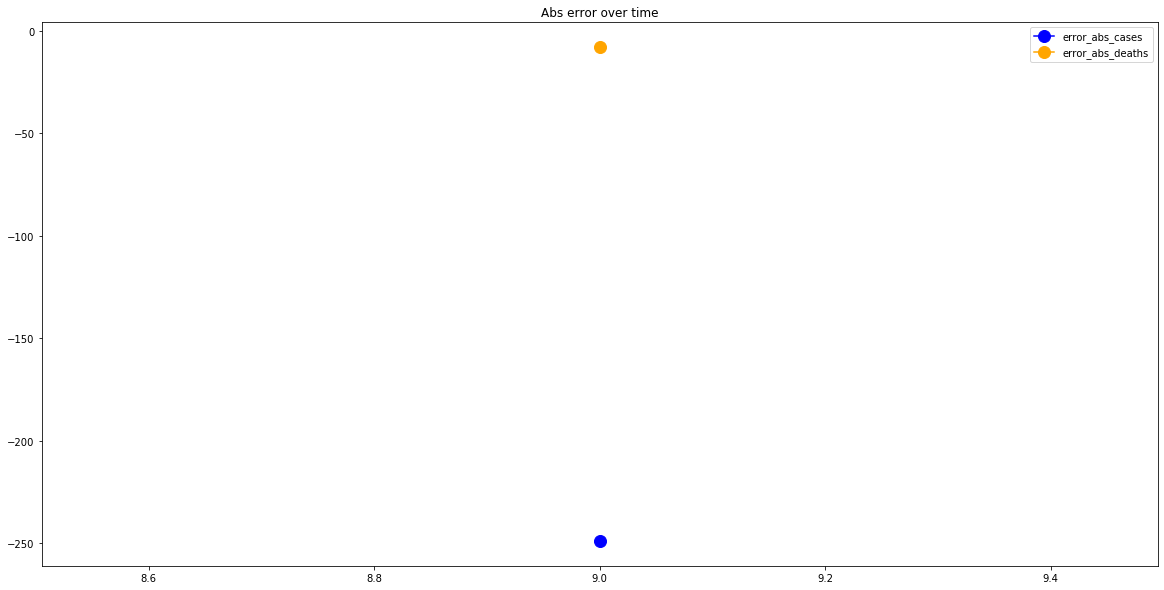

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  6454.0
RMSE =  6454.0
-- Brazil performances for deaths --
MAPE =  537.0
RMSE =  537.0


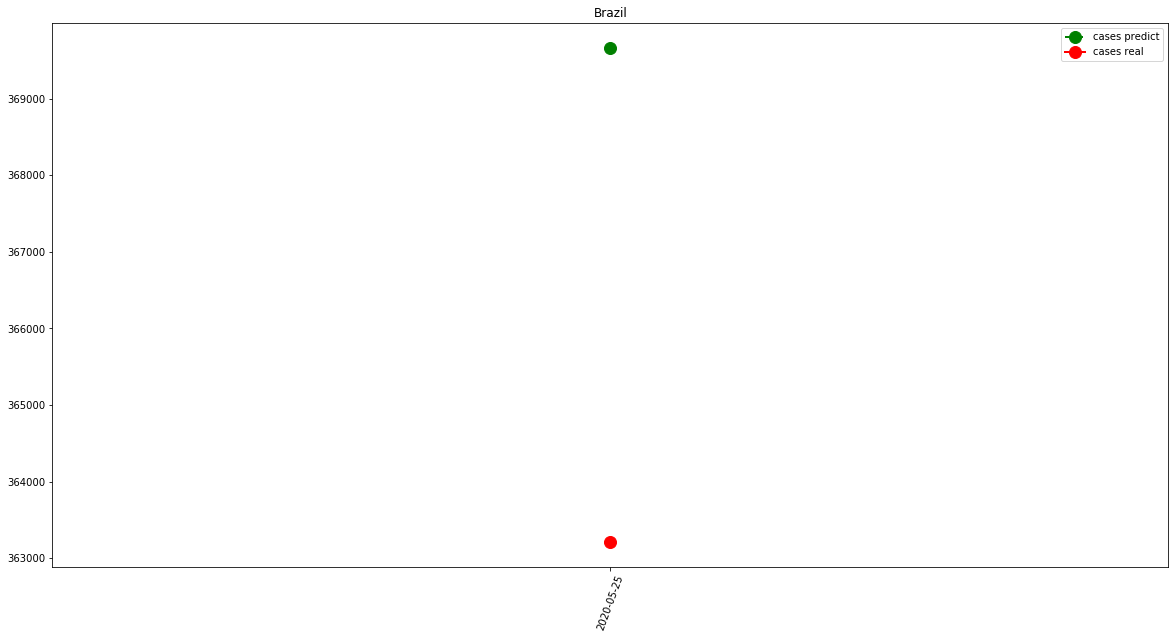

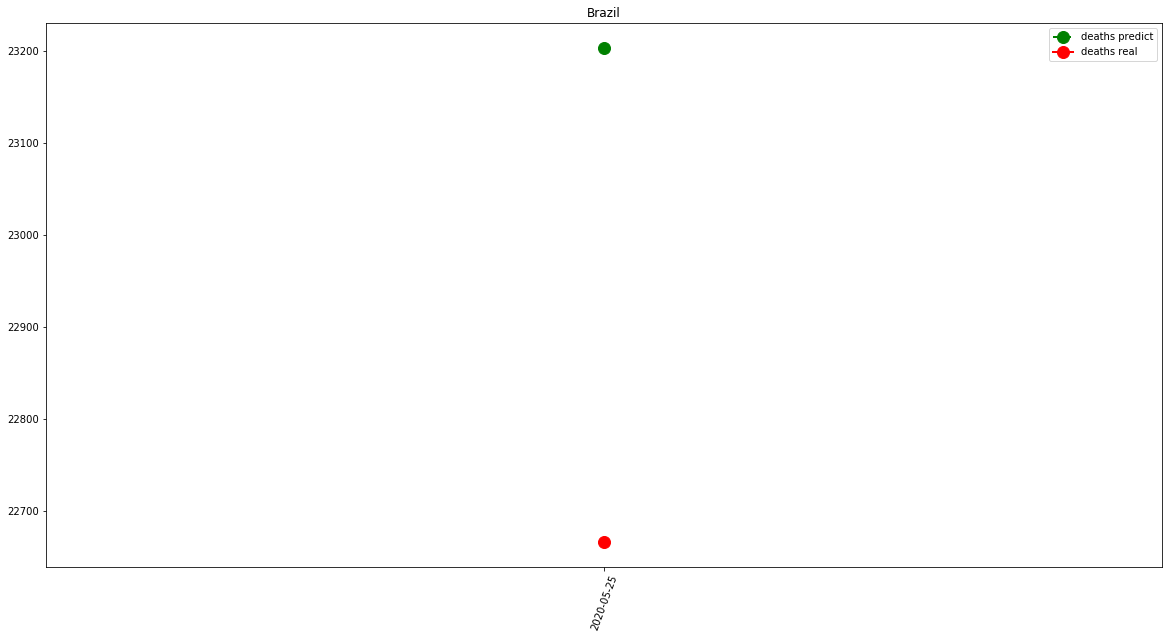

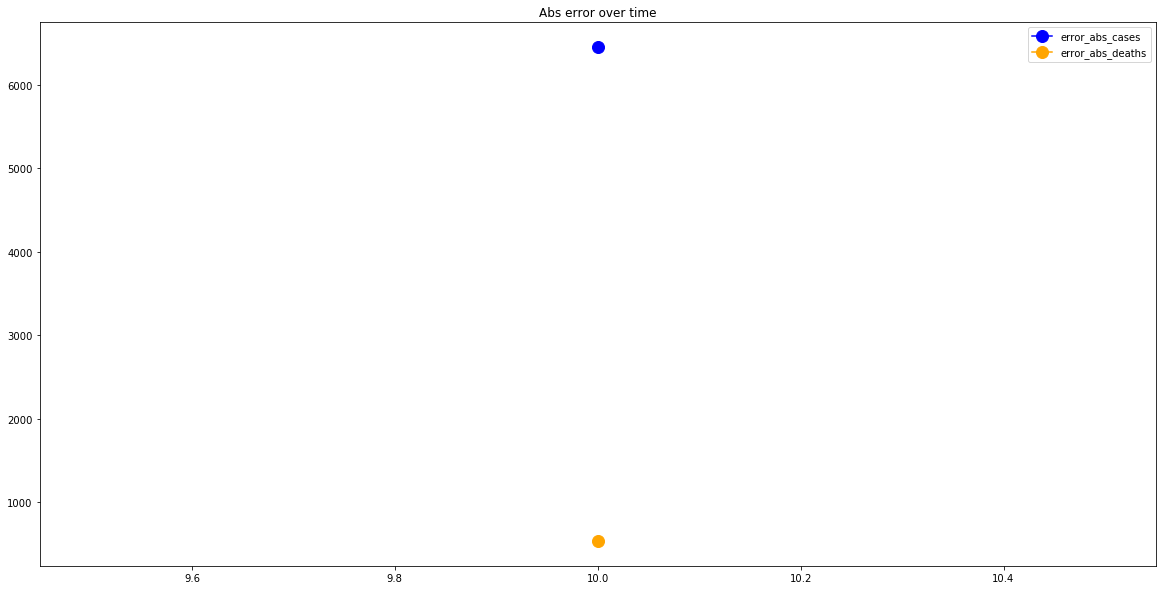

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)